This script can be used to analyze the following parameters per condition:
* Activity (Spikes/s)

For usage, the <i>filename</i> variable must be changed accordingly. <br>
<br>
As is, the display only differentiates between angiotensin-II concentrations. Please change accordingly if other or more parameters shall be investigated.<br>
<br>

<i>Version: 20200424_1_GS</i>

In [22]:
import calim
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd

In [23]:

filename = "Cacna1h_KO_Cal520.pkl"

data_pkl = pickle.load(open(filename, "rb"))

In [25]:
# The DataFrame "conditions" will contain all information about conditions
data = pd.DataFrame()
print(f"Processing recordings contained in {filename}:")

for recording in data_pkl.recordings:
    print(recording)
    
    r = data_pkl.recordings[recording]

    info = {desc: r.information[desc] for desc in r.information}
    
    for cell in r.cells:
        c = r.cells[cell]
        
        if c.use:
            for con in r.conditions:
                info["recording"] = recording
                info["start"] = int(con.start)
                info["end"] = int(con.end)
                info["cell"] = cell
                info["dt"] = r.dt # Add "dt" aka seconds/frame
                info.update({desc: con.information[desc] for desc in con.information}) # Add all further condition variables
                info["num_events"]  = len(list(c.get_event(range(info["start"], info["end"])))) # Number of events
                info["activity"] = (info["num_events"]/(info["end"]-info["start"]))/r.dt # Events/s
                
                data = data.append(pd.Series(info), ignore_index=True)
print("Done.")

Processing recordings contained in Cacna1h_KO_Cal520.pkl:
200217_s1r2_Results.csv
200218_s1r2_Results.csv
200319_s1r2_Results.csv
200319_s2r1_Results.csv
200320_s1r1_Results.csv
200320_s2r1_Results.csv
200320_s3r1_Results.csv
200320_s4r1_Results.csv
Done


In [27]:
data.head()

,activity,angiotensin,animal,birthdate,cell,dt,end,genotype,num_events,potassium,recording,start
0,0.380000,500,USC-01735,2019-10-18,Mean1,0.02,45000.0,KO,342.0,4,200217_s1r2_Results.csv,0.0
1,0.366667,500,USC-01735,2019-10-18,Mean2,0.02,45000.0,KO,330.0,4,200217_s1r2_Results.csv,0.0
2,0.490000,500,USC-01735,2019-10-18,Mean3,0.02,45000.0,KO,441.0,4,200217_s1r2_Results.csv,0.0
3,0.198889,500,USC-01735,2019-10-18,Mean6,0.02,45000.0,KO,179.0,4,200217_s1r2_Results.csv,0.0
4,0.455556,500,USC-01735,2019-10-18,Mean7,0.02,45000.0,KO,410.0,4,200217_s1r2_Results.csv,0.0


<Figure size 432x288 with 0 Axes>

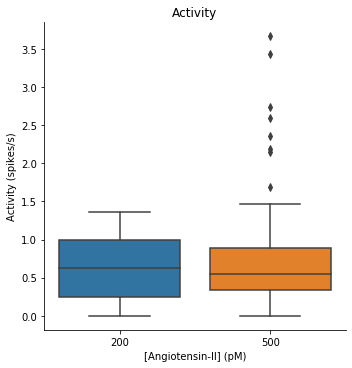

<Figure size 432x288 with 0 Axes>

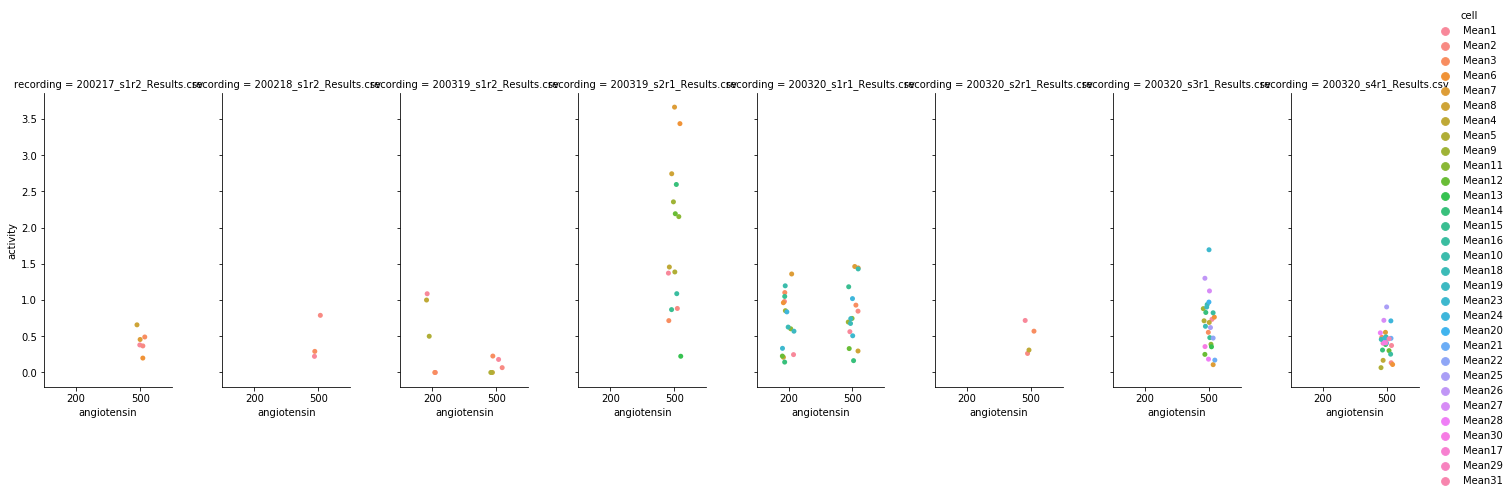

In [29]:
plt.figure()
sns.catplot(x="angiotensin", y="activity", data=data, kind="box")
plt.title("Activity")
plt.xlabel("[Angiotensin-II] (pM)")
plt.ylabel("Activity (spikes/s)")
plt.show()

# Plot per animal

plt.figure()
sns.catplot(x="angiotensin", y="activity", hue="cell", col="recording", data=data, aspect=0.5)
plt.show()